# TP Métaheuristiques

## 1ère étape

### Lecture des jeux de données

https://homepages.laas.fr/huguet/drupal/content/métaheuristiques-4ir-info#overlay-context=content/m%25C3%25A9ta-heuristiques-4ir-info  

In [110]:
# Classes

class Evacuation:
    # Liste des noeuds à évacuer
    # Nombre de noeuds à évacuer
    # Le noeud sur
    
    def __init__(self):
        self.listeNoeudsE = []
    def sur(self, c):
        self.nombreNoeudsE = int(c[0])
        self.noeudSur = int(c[1])
    def ajoutNoeudE(self, c):
        nouveauNoeudE = NoeudAEvacuer(c)
        self.listeNoeudsE.append(nouveauNoeudE)
        
class NoeudAEvacuer:
    # ID/Population/taux d'évacuation max
    # Chemin d'évacuation, composé des id des noeuds par lesquels passer
    def __init__(self, c):
        self.nom = int(c[0])
        self.pop = int(c[1])
        self.tauxE = int(c[2])
        self.cheminE = [int(noeudId) for noeudId in c[4:]]
    def setTauxE(self, newTauxE):
        self.tauxE = newTauxE
        
class Graphe: 
    # Liste d'arcs UTILES
    # Nombre d'arcs UTILES
    def __init__(self):
        self.listeArcs = []
    def nombre(self,c):
        self.nombreArcs = int(c[1])
    def ajoutArc(self, c):
        nouveauArc = Arc(c)
        self.listeArcs.append(nouveauArc)
        # On ajoute le même arc avec ses bornes inversées.
        x = int(c[0])
        c[0] = int(c[1])
        c[1] = x
        nouveauArc = Arc(c)
        self.listeArcs.append(nouveauArc)

class Arc: 
    # Arc origine/destination(int) ??  /Durée(int)/Capa(int) 
    def __init__(self, c):
        self.origine = int(c[0])
        self.destination = int(c[1])
        self.duree = int(c[3])
        self.capa = int(c[4])
        
# ------------------------------------

# Fonction principale

def lecture(nomFichier): 
    evacuation = Evacuation()
    graphe = Graphe()
    with open("./Ressources/" + nomFichier, "r") as fichier :
        # print ("Name of the file: " + fichier.name)

        # Liste des lignes du fichier
        lignes = fichier.readlines()
        
        # Traitement de l'instance
        val = 1
        for ligne in lignes[1:]: 
            c = ligne.split()
            if c[0] == 'c': 
                val = 2
            else:
                if val == 1:
                    traitementEvacuation(c, evacuation)
                elif val == 2:
                    traitementGraphe(c, graphe)
                else :
                    sys.exit("[Erreur] lecture(nomFichier, arbre, graphe)")
                    
        # Suppression des arcs inutiles
        majArcsUtiles(evacuation, graphe)
        
        # Mise à jour du taux d'évacuation des noeuds à évacuer
        for noeudE in evacuation.listeNoeudsE: 
            origines = noeudE.cheminE[:-1]
            origines.append(noeudE.nom)
            capacites = [arc.capa for arc in graphe.listeArcs if (arc.origine in origines)]
            noeudE.setTauxE(min(capacites))
            
        # Fermeture du fichier
        fichier.close()
        # Fin de la lecture
        
        return evacuation, graphe

# ---------------------------------

# Fonctions annexes

def traitementEvacuation(c, evacuation):
    if len(c) != 2:
        evacuation.ajoutNoeudE(c)
    else:
        evacuation.sur(c)
        
def traitementGraphe(c, graphe):
    if len(c) != 2: 
        graphe.ajoutArc(c)
    else:
        graphe.nombre(c)

def majArcsUtiles(evacuation, graphe):    
    # Création d'une liste d'arcs vraiment utiles issus de l'arbre.
    arcsUtiles = []
    for noeud in evacuation.listeNoeudsE:
        arc = [noeud.nom, noeud.cheminE[0]]
        if arc not in arcsUtiles:
            arcsUtiles.append(arc)
        i = 0
        while True:
            arc = [noeud.cheminE[i], noeud.cheminE[i+1]]
            if arc not in arcsUtiles:
                arcsUtiles.append(arc)
            i = i + 1
            if(noeud.cheminE[i] == evacuation.noeudSur):
                break
        
    # Comparaison des arcs du graphe avec la liste arcsUtiles.
    nouveauxArcs = []
    for arcPossible in graphe.listeArcs:
        if [arcPossible.origine,arcPossible.destination] in arcsUtiles:
            nouveauxArcs.append(arcPossible)
            
    graphe.listeArcs = nouveauxArcs
    graphe.nombreArcs = len(graphe.listeArcs)

    
def affichage(evacuation, graphe):
    print("")
    print("=============================================")
    print("--- E V A C U A T I O N ---")
    print("Noeud sûr : %s." %(evacuation.noeudSur))
    print("Nombre de noeuds à évacuer : %s." %(evacuation.nombreNoeudsE)) 
    print("ID - Pop - TauxE (+ Chemin)")
    for noeudE in evacuation.listeNoeudsE:
        print("%s     %s     %s" %(noeudE.nom, noeudE.pop, noeudE.tauxE))
        print(*noeudE.cheminE, sep = " ==> ")
        print("------------------------------------")
    print("")
    print("--- A R B R E ---")
    print("Nombre d'arcs : %s." %(graphe.nombreArcs))
    print("Orig/Dest -- Durée -- Capacité")
    for arc in graphe.listeArcs:
        print("  %s/%s       %s      %s" %(arc.origine, arc.destination, arc.duree, arc.capa))
        print("------------------------------------")
    print("=============================================")    

Testons la méthode de lecture des données sur l'exemple du cours : 

In [111]:
def testLecture(nomFichier): 
    evacuation, graphe = lecture(nomFichier)
    affichage(evacuation, graphe)

testLecture("sparse_10_30_3_2_I.full")


--- E V A C U A T I O N ---
Noeud sûr : 114.
Nombre de noeuds à évacuer : 10.
ID - Pop - TauxE (+ Chemin)
117     4316     70
64 ==> 220 ==> 173 ==> 228 ==> 75 ==> 18 ==> 2 ==> 252 ==> 167 ==> 110 ==> 267 ==> 14 ==> 190 ==> 114
------------------------------------
199     4230     72
213 ==> 149 ==> 21 ==> 208 ==> 206 ==> 80 ==> 66 ==> 61 ==> 75 ==> 18 ==> 2 ==> 252 ==> 167 ==> 110 ==> 267 ==> 14 ==> 190 ==> 114
------------------------------------
271     3514     74
8 ==> 163 ==> 144 ==> 129 ==> 24 ==> 224 ==> 74 ==> 16 ==> 232 ==> 32 ==> 114
------------------------------------
84     129     71
5 ==> 98 ==> 236 ==> 93 ==> 105 ==> 204 ==> 17 ==> 81 ==> 13 ==> 97 ==> 77 ==> 148 ==> 54 ==> 48 ==> 90 ==> 227 ==> 189 ==> 86 ==> 235 ==> 225 ==> 10 ==> 146 ==> 63 ==> 246 ==> 39 ==> 44 ==> 232 ==> 32 ==> 114
------------------------------------
24     4541     134
224 ==> 74 ==> 16 ==> 232 ==> 32 ==> 114
------------------------------------
164     1152     74
248 ==> 261 ==> 183 ==> 74 =

### Vérification et évaluation d’une solution

#### Données de l'exemple

cf exemple_cours.txt

#### Fichier solution de l'exemple

cf exemple_cours_solution.txt

#### Vérification de la solution

* Vérifier si la solution est réalisable = Respecte les contraintes.
    * vérifier à chaque instant t si la capacité de l'arc n'est pas dépassée = simulation
* Vérifier la valeur de la fonction objectif. Pour chaque noeud : 
    * trouver le nombre de personnes à évacuer
    * calculer la durée de transit des personnes de ce noeud : transit = noeudE.pop / solution.tauxE
    * calculer la durée du trajet du noeud à évacuer vers le noeud sécurisé : trajet = somme des durées des arcs du chemin d'évacuation
    * calculer la durée dévacuation de ce noeud : duree = transit + trajet

La valeur de la fonction objectif est le max des durées trouvées pour chaque noeud à évacuer. 

In [112]:
import numpy as np
import pandas as pd

# Fonction principale
    
def verification(evacuation, graphe, solution):
    result = True
    valFctObjectif = valFonctionObjectif(evacuation, graphe, solution)
    if(valFctObjectif != solution.valFctObjectif):
        result = False
        print("\nValeur de la fonction objectif erronée : " + str(valFctObjectif) + " au lieu de " + str(solution.valFctObjectif) +".")
    else:   
    # Vérifier si la solution est réalisable
        # print("\n[DEBUG] Valeur de la fonction objectif : " + str(result))
        # On vérifie que la capacité de chaque arc est bien respectée
        # affichage_gantt(gantt)
        simu = True
        for arc in graphe.listeArcs:
            if(solution.gantt.loc[arc.origine, :] > arc.capa).any():
                simu = False
                result = False
        # print("[DEBUG] Simulation = " + str(simu))
            
    return result
        
# ---------------------------------

# Fonctions annexes

def valFonctionObjectif(evacuation, graphe, solution) : 
    # Vérifier la valeur de la fonction objectif
    # Pour chaque noeud à évacuer : 
    durees = []

    for noeudE in evacuation.listeNoeudsE: 
        # Trouver le nombre de personnes à évacuer 
        # Calculer la durée de transit des personnes de ce noeud : 
            # transit = noeudE.pop / solution.tauxE
        bonNoeudE = [noeudESol for noeudESol in solution.listeNoeudsESol if (noeudE.nom == noeudESol.nom)]
        transit = round(noeudE.pop / bonNoeudE[0].tauxE)
        # Calculer la durée du trajet du noeud à évacuer vers le noeud sécurisé : 
            # trajet = somme des durées des arcs du chemin d'évacuation
        origines = noeudE.cheminE[:-1]
        origines.append(noeudE.nom)
        trajet = round(sum([arc.duree for arc in graphe.listeArcs if (arc.origine in origines)]))
        
        # Calculer la durée d'évacuation de ce noeud : duree = transit + trajet
        durees.append(transit + trajet + bonNoeudE[0].dateE)
    
    valFctObjectif = max(durees)
    return valFctObjectif

def lectureSolution(nomFichierSolution, evacuation, graphe): 
    solution = Solution()
    with open("./Ressources/" + nomFichierSolution, "r") as fichier :
        # print ("Name of the file: " + fichier.name)

        # Liste des lignes du fichier
        lignes = fichier.readlines()
        
        # Traitement de l'instance
        solution.nom = lignes[0].split()[0]
        nbNoeudsE = int(lignes[1].split()[0])
        for ligne in lignes[2:(2+nbNoeudsE)]:
            c = ligne.split()
            solution.ajoutNoeudESol(int(c[0]), int(c[1]), int(c[2]))
        solution.nature = lignes[2+nbNoeudsE].split()[0]
        solution.valFctObjectif = int(lignes[2+nbNoeudsE+1].split()[0])
        solution.tpsCalcul = int(lignes[2+nbNoeudsE+2].split()[0])
        solution.methode = " ".join(lignes[2+nbNoeudsE+3].split())
        solution.commentaire = " ".join(lignes[2+nbNoeudsE+4].split())
                                    
        # Fermeture du fichier
        fichier.close()
        
        # Création du diagramme de Gantt associé à la solution
        creationGantt(evacuation, graphe, solution)

    return solution

def affichageSolution(solution): 
    print("--- S O L U T I O N ---")
    print("Nom de l'instance résolue : " + solution.nom)
    print("Noeuds à évacuer : ")
    for noeud in solution.listeNoeudsESol:
        print("     ID : " + str(noeud.nom) + " - Taux d'évacuation : " + str(noeud.tauxE) + " - Date de début d'évacuation : " + str(noeud.dateE))
    print("Nature : " + solution.nature)
    print("Valeur de la fonction objectif : " + str(solution.valFctObjectif))
    print("Temps de calcul : " + str(solution.tpsCalcul) + " s")
    print("Méthode de résolution : " + solution.methode)
    print("Commentaire : " + solution.commentaire)
    print("")

def creationGantt(evacuation, graphe, solution): 
    # Durée théorique de l'évacuation
    valFctObjectif = valFonctionObjectif(evacuation, graphe, solution)
    
    # On itialise 
    gantt = np.zeros((len(graphe.listeArcs), valFctObjectif-[arc.duree for arc in graphe.listeArcs if (arc.destination == evacuation.noeudSur)][0]), dtype=int)
    gantt = pd.DataFrame(gantt, index = [arc.origine for arc in graphe.listeArcs])

    # Pour chaque noeud à évacuer, on va remplir la capacité que l'on utilise sur chaque arc à chaque instant
    for noeudE in evacuation.listeNoeudsE: 
        bonNoeudE = [noeudESol for noeudESol in solution.listeNoeudsESol if (noeudE.nom == noeudESol.nom)][0]
        transit = round(noeudE.pop / bonNoeudE.tauxE)
        # On retrouve la durée de début d'évacuation
        time = [noeud.dateE for noeud in solution.listeNoeudsESol if (noeudE.nom == noeud.nom)][0]
        origines = noeudE.cheminE[:-1]
        origines.append(noeudE.nom)
        for arc in [arc for arc in graphe.listeArcs if (arc.origine in origines)]: 
            gantt.loc[arc.origine, time:(time+transit-1)] += bonNoeudE.tauxE
            time += arc.duree
    solution.gantt = gantt

def affichageGantt(gantt):
    print("\n--- G A N T T ---")
    print(gantt)
    print("\n")

# ---------------------------------

# Classes

class NoeudAEvacuerSol: 
    # Identifiant
    # Taux d'évacuation
    # Date de début d'évacuation
    def __init__(self, pNom, pTauxE, pDateE): 
        self.nom = pNom
        self.tauxE = pTauxE
        self.dateE = pDateE

class Solution:
    # Nom de l'instance résolue
    # Pour chaque sommet à évacuer
        # Identifiant
        # Taux d'évacuation
        # Date de début d'évacuation
    # Nature de la solution (valid ou invalid)
    # Valeur de la fonction objectif
    # Temps de calcul
    # Méthode utilisée
    # Commentaire
    
    def __init__(self):
        self.listeNoeudsESol = []
    def ajoutNoeudESol(self, pNom, pTauxE, pDateE):
        nouveauNoeudESol = NoeudAEvacuerSol(pNom, pTauxE, pDateE)
        self.listeNoeudsESol.append(nouveauNoeudESol)

Testons la méthode de vérification d'une solution sur l'exemple du cours : 

In [113]:
def testVerification1(nomFichier, nomFichierSolution):
    evacuation, graphe = lecture(nomFichier)
    solution = lectureSolution(nomFichierSolution, evacuation, graphe)
    result = verification(evacuation, graphe, solution)
    affichageSolution(solution)
    affichageGantt(solution.gantt)
    print("Solution vérifiée : " + str(result))

testVerification1("exemple_cours.txt", "exemple_cours_solution.txt")

def testVerification2(nomFichier, nomFichierSolution):
    evacuation, graphe = lecture(nomFichier)
    solution = lectureSolution(nomFichierSolution, evacuation, graphe)
    result = verification(evacuation, graphe, solution)
    affichageSolution(solution)
    print("Solution vérifiée : " + str(result))

testVerification2("exemple_cours.txt", "exemple_cours_solution_prof.txt")

--- S O L U T I O N ---
Nom de l'instance résolue : exemple_cours.txt
Noeuds à évacuer : 
     ID : 1 - Taux d'évacuation : 7 - Date de début d'évacuation : 1
     ID : 2 - Taux d'évacuation : 3 - Date de début d'évacuation : 0
     ID : 3 - Taux d'évacuation : 3 - Date de début d'évacuation : 0
Nature : valid
Valeur de la fonction objectif : 36
Temps de calcul : 1000 s
Méthode de résolution : resolu a la main
Commentaire : *** Laure Feuillet & Mael Plantec ***


--- G A N T T ---
   0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  19  20  21  \
1   0   7   7   7   7   7   7   7   0   0 ...   0   0   0   0   0   0   0   0   
2   3   3   3   3   3   3   3   3   3   3 ...   0   0   0   0   0   0   0   0   
3   3   3   3   3   3   3   3   3   3   3 ...   0   0   0   0   0   0   0   0   
4   0   0   0   0   3   3   3   3  10  10 ...   7   0   0   0   0   0   0   0   
5   0   0   0   0   0   0   3   3   3   3 ...   6   6   6  10  10  10  10  10   

   22  23  
1   0   0  
2  

## 2ème étape
### Calcul d'une borne inférieure

On prends ici le temps d'évacuation maximum parmis les noeuds à évacuer. En effet, le noeud qui seul, serait le plus long à finir, donne une borne inférieure car ajouter des noeuds de temps d'évac inférieurs ne va pas accélérer l'évacuation de ce premier. 

In [114]:
from datetime import datetime
from pathlib import Path

def borneInf(nomFichier, evacuation, graphe):
    dateDebut = datetime.now()
    # print(datetime.now())
    borneInfSolution = Solution()
    # Nom de l'instance résolue
    borneInfSolution.nom = nomFichier
    borne = 0
    # Noeuds évacués 
    for noeudE in evacuation.listeNoeudsE: 
        borneInfSolution.ajoutNoeudESol(noeudE.nom, noeudE.tauxE, 0)
        # On met à jour la valeur de durée
            # Calculer la durée de transit des personnes de ce noeud : 
        transit = round(noeudE.pop / noeudE.tauxE)
            # Calculer la durée du trajet du noeud à évacuer vers le noeud sécurisé : 
            # trajet = somme des durées des arcs du chemin d'évacuation
        origines = noeudE.cheminE[:-1]
        origines.append(noeudE.nom)
        trajet = round(sum([arc.duree for arc in graphe.listeArcs if (arc.origine in origines)]))
            # Calculer la durée dévacuation de ce noeud : duree = transit + trajet
        nouveauTemps = transit + trajet
        if borne < nouveauTemps :
            borne = nouveauTemps
            
    # Nature de la solution
    borneInfSolution.nature = "unknown"
        
    # Valeur de la fonction objectif
    borneInfSolution.valFctObjectif = borne

    # Méthode 
    borneInfSolution.methode = "Borne inférieure"

    # Commentaire
    borneInfSolution.commentaire = "Laure Feuillet & Mael Plantec"
    
    # Gantt
    creationGantt(evacuation, graphe, borneInfSolution)
    
    result = verification(evacuation, graphe, borneInfSolution)
    
    if result: 
        borneInfSolution.nature = "valid"
    else: 
        borneInfSolution.nature = "invalid"
    
    # Temps de calcul
    borneInfSolution.tpsCalcul = (datetime.now() - dateDebut).total_seconds()
        
    return borneInfSolution
      
# ---------------------------------

# Fonctions annexes

def ecritureSolution(nomFichierSolution, solution):
    with open("./Ressources/" + nomFichierSolution, "w") as fichier :
        # Nom de l'instance résolue
        fichier.write(solution.nom + "\n")
        # Nombre de sommets à évacuer
        fichier.write(str(len(solution.listeNoeudsESol)) + "\n")
        
        for noeudESol in solution.listeNoeudsESol:
            # identifiant
            fichier.write(str(noeudESol.nom) + " ")
            # taux d'évacuation
            fichier.write(str(noeudESol.tauxE) + " ")
            # date de début d'évacuation
            fichier.write(str(noeudESol.dateE)+ "\n")

        # Nature de la solution
        fichier.write(solution.nature + "\n")
        
        # Valeur de la fonction objectif
        fichier.write(str(solution.valFctObjectif) + "\n")
            
        # Temps de calcul
        fichier.write(str(solution.tpsCalcul) + "\n")
        
        # Méthode 
        fichier.write(solution.methode + "\n")
        
        # Commentaire
        fichier.write(solution.commentaire)
        
        # Fermeture du fichier
        fichier.close()

In [145]:
def testBorneInf(nomFichier): 
    evacuation, graphe = lecture(nomFichier)
    borneInfSolution = borneInf(nomFichier, evacuation, graphe)
    # nomFichierBorneInf = Path("./Ressources/"+ nomFichier).stem + "_borneInf" + Path("./Ressources/"+ nomFichier).suffix
    affichageSolution(borneInfSolution)
    verif = verification(evacuation, graphe, borneInfSolution)
    print("Vérification Borne Inf : " + str(verif))
    
testBorneInf("exemple_cours.txt")
testBorneInf("sparse_10_30_3_2_I.full")

--- S O L U T I O N ---
Nom de l'instance résolue : exemple_cours.txt
Noeuds à évacuer : 
     ID : 1 - Taux d'évacuation : 8 - Date de début d'évacuation : 0
     ID : 2 - Taux d'évacuation : 5 - Date de début d'évacuation : 0
     ID : 3 - Taux d'évacuation : 3 - Date de début d'évacuation : 0
Nature : invalid
Valeur de la fonction objectif : 34
Temps de calcul : 0.00801 s
Méthode de résolution : Borne inférieure
Commentaire : Laure Feuillet & Mael Plantec

Vérification Borne Inf : False
--- S O L U T I O N ---
Nom de l'instance résolue : sparse_10_30_3_2_I.full
Noeuds à évacuer : 
     ID : 117 - Taux d'évacuation : 70 - Date de début d'évacuation : 0
     ID : 199 - Taux d'évacuation : 72 - Date de début d'évacuation : 0
     ID : 271 - Taux d'évacuation : 74 - Date de début d'évacuation : 0
     ID : 84 - Taux d'évacuation : 71 - Date de début d'évacuation : 0
     ID : 24 - Taux d'évacuation : 134 - Date de début d'évacuation : 0
     ID : 164 - Taux d'évacuation : 74 - Date de d

### Calcul d'une borne supérieure

Somme de la durée d'évacuation de chaque noeud au taux d'évacuation maximum.

In [116]:
def borneSup(nomFichier, evacuation, graphe):
    dateDebut = datetime.now()
    
    borneSupSolution = Solution()
        
    # Nom de l'instance résolue
    borneSupSolution.nom = nomFichier
    
    # Pour chaque sommet à évacuer
    duree = 0
    for noeudE in evacuation.listeNoeudsE: 
        # identifiant & taux d'évacuation & date de début d'évacuation
        borneSupSolution.ajoutNoeudESol(noeudE.nom, noeudE.tauxE, duree)

        # On met à jour la valeur de durée
            # Calculer la durée de transit des personnes de ce noeud : 
        transit = round(noeudE.pop / noeudE.tauxE)
            # Calculer la durée du trajet du noeud à évacuer vers le noeud sécurisé : 
            # trajet = somme des durées des arcs du chemin d'évacuation
        origines = noeudE.cheminE[:-1]
        origines.append(noeudE.nom)
        trajet = round(sum([arc.duree for arc in graphe.listeArcs[:-1] if (arc.origine in origines)]))
            # Calculer la durée dévacuation de ce noeud : duree = transit + trajet
        duree += transit + trajet
    duree += [arc.duree for arc in graphe.listeArcs if (arc.destination == evacuation.noeudSur)][0]
    # Nature de la solution
    borneSupSolution.nature = "valid"
    # Valeur de la fonction objectif
    borneSupSolution.valFctObjectif = duree
    # Méthode 
    borneSupSolution.methode = "Borne superieure"
    # Commentaire
    borneSupSolution.commentaire = "*** Laure Feuillet & Mael Plantec ***"
    # Gantt
    creationGantt(evacuation, graphe, borneSupSolution)
    # Temps de calcul
    borneSupSolution.tpsCalcul = (datetime.now() - dateDebut).total_seconds()
    
    return borneSupSolution

In [146]:
def testBorneSup(nomFichier): 
    evacuation, graphe = lecture(nomFichier)
    affichage(evacuation, graphe)
    borneSupSolution = borneSup(nomFichier, evacuation, graphe)
    # nomFichierBorneSup = Path("./Ressources/"+ nomFichier).stem + "_borneSup" + Path("./Ressources/"+ nomFichier).suffix
    affichageSolution(borneSupSolution)
    verif = verification(evacuation, graphe, borneSupSolution)
    print("Vérification Borne Sup : " + str(verif))
    
testBorneSup("exemple_cours.txt")
testBorneSup("sparse_10_30_3_2_I.full")


--- E V A C U A T I O N ---
Noeud sûr : 6.
Nombre de noeuds à évacuer : 3.
ID - Pop - TauxE (+ Chemin)
1     48     8
4 ==> 5 ==> 6
------------------------------------
2     30     5
4 ==> 5 ==> 6
------------------------------------
3     33     3
5 ==> 6
------------------------------------

--- A R B R E ---
Nombre d'arcs : 5.
Orig/Dest -- Durée -- Capacité
  1/4       7      8
------------------------------------
  2/4       4      5
------------------------------------
  3/5       6      3
------------------------------------
  4/5       9      10
------------------------------------
  5/6       12      11
------------------------------------
--- S O L U T I O N ---
Nom de l'instance résolue : exemple_cours.txt
Noeuds à évacuer : 
     ID : 1 - Taux d'évacuation : 8 - Date de début d'évacuation : 0
     ID : 2 - Taux d'évacuation : 5 - Date de début d'évacuation : 22
     ID : 3 - Taux d'évacuation : 3 - Date de début d'évacuation : 41
Nature : valid
Valeur de la fonction object

## 3ème étape - Intensification
### Solutions initiales

In [118]:
# Retourne la solution initiale (borne sup) de l'instance du problème passé en paramètre.
def solutionInitiale_borneSup (nomFichier, evacuation, graphe) :
    borneSupSolution = borneSup(nomFichier, evacuation, graphe)
    return borneSupSolution

### Fonctions objectifs

In [119]:
# Retourne la valeur de la fonction objectif (temps d'évacuation) de la solution.
def fonctionObjectif_tempsEvacuation (solution, graphe) : 
    return solution.valFctObjectif

# Utile pour la fonction suivante : retourne l'écart avec la solution, donc les "débords" sur les arcs.
def ecartRealisation(solution, graphe) :
    ecart = 0
    # DIMINUER LA COMPLEXITE
    for origineArc in solution.gantt.index :
        arcCapa = [arc.capa for arc in graphe.listeArcs if (arc.origine == origineArc)][0]
        for tps in solution.gantt.columns :
            # Si il existe un débordement dans un des arcs, on ajoute cette valeur à "écart".
            if (arcCapa < solution.gantt.loc[origineArc, tps]) :
                ecart += solution.gantt.loc[origineArc, tps] - arcCapa
            
    return ecart

# Retourne la valeur de la fonction objectif (équation : temps d'évacuation x écart avec la réalisation) de la solution.
def fonctionObjectif_tempsEv_ecartRealisation (solution, graphe) :
    
    return solution.valFctObjectif
    # return (solution.valFctObjectif + ecartRealisation(solution, graphe))

In [120]:
def testFonctionObjectif (nomFichier, fonctionObjectif) :
    evacuation, graphe = lecture(nomFichier)
    solution = borneSup(nomFichier, evacuation, graphe)
    # verification(evacuation, graphe, solution)
    print(fonctionObjectif(solution, graphe))
    
testFonctionObjectif("exemple_cours.txt", fonctionObjectif_tempsEv_ecartRealisation)

70


### Critères d'arrêt

In [121]:
# Retourne true si on doit arrêter l'algo, false sinon (20 itérations).
def critereArret_20iterations (nbIterations):
    return (nbIterations >= 20)

# Moyenne glissante avec une file de 5 et un pourcentage d'acceptation de 5%. (minimum 10 itérations)
def critereArret_moyenneGlissante_5_3(fctObjSolCourante, file, nbIterations) :
    moy = sum(file)/5
    arret = False
    # On compare [la différence entre la sol courante et la moyenneG] et le dernier de la file.
    if ((abs(fctObjSolCourante - moy)) < (fctObjSolCourante/100)) :
        # Si ils sont différent à moins de 1%, on arrête.
        arret = True
    else :
        # On ajoute à la file et on enlève le premier.
       file.pop(0)
       file.append(fctObjSolCourante)
    return (arret and (nbIterations >= 15))

# Moyenne glissante + % sur le borne inf.
def critereArret_moyG_espace(fctObjSolCourante, file, nbIterations, espace, BI) :
    moy = sum(file)/5
    arret = False
    # Tant qu'on a pas parcouru 80% de l'espace.
    if fctObjSolCourante < (BI+(espace/2)) :
        # On compare [la différence entre la sol courante et la moyenneG] et le dernier de la file.
        if ((abs(fctObjSolCourante - moy)) < (fctObjSolCourante/10)) :
            # Si ils sont différent à moins de 10%, on arrête.
            arret = True
    else :
        # On ajoute à la file et on enlève le premier.
       file.pop(0)
       file.append(fctObjSolCourante)
    return (arret and (nbIterations >= 10))

In [122]:
def testCritereArret(fonctionArret, fctObjSolCourante, file, nbIterations) :
    arret = fonctionArret(fctObjSolCourante, file, nbIterations)
    print(*file)
    print(arret)
    
testCritereArret(critereArret_moyenneGlissante_5_3, 99, [100,100,100,100,100], 1)

100 100 100 100 99
False


### Méthodes de voisinage

In [123]:
import copy

# Retourne une liste de solutions
def voisinage_uniqueDecrementation (solution, evacuation, graphe) : 
    voisinage = []
    for noeudE in solution.listeNoeudsESol : 
        # On décrémente de 1 les dates d'évacuation non nulles
        if (noeudE.dateE != 0) : 
            voisin = copy.deepcopy(solution)
            noeudEVoisin = [noeudEVoisin for noeudEVoisin in voisin.listeNoeudsESol if (noeudE.nom == noeudEVoisin.nom)][0] 
            # Mise à jour du voisin
            # # Date de début d'évacuation
            noeudEVoisin.dateE = noeudEVoisin.dateE-1
            # # Valeur de la fonction objectif du voisin
            voisin.valFctObjectif = valFonctionObjectif(evacuation, graphe, voisin)
            # # Gantt
            creationGantt(evacuation, graphe, voisin)
            # # Nature
            result = verification(evacuation, graphe, voisin)
            if result :
                voisin.nature = "valid"
            else : 
                voisin.nature = "invalid"
                
            voisinage.append(voisin)
    return voisinage

def voisinage_pluriVoisinages (solution, evacuation, graphe, espace, BI) :
    voisinage = []
    # Si il n'y a pas d'écart de réalisation, ie si la solution est réalisable, on travaille sur les dates.
    if (solution.nature == "valid" or solution.nature == "invalid") :
        #print("Dates.")
        # Si on est encore au dessus de 50% de l'espace ...
        if (solution.valFctObjectif >= ((espace//2)+BI)) :
            for noeudE in solution.listeNoeudsESol : 
            # On décrémente de 50% les dates d'évacuation non nulles
                if (noeudE.dateE != 0) : 
                    voisin = copy.deepcopy(solution)
                    noeudEVoisin = [noeudEVoisin for noeudEVoisin in voisin.listeNoeudsESol if (noeudE.nom == noeudEVoisin.nom)][0] 
                    # Mise à jour du voisin
                    # # Date de début d'évacuation
                    noeudEVoisin.dateE = noeudEVoisin.dateE - (round(espace/4))
                    # # Valeur de la fonction objectif du voisin
                    voisin.valFctObjectif = valFonctionObjectif(evacuation, graphe, voisin)
                    # # Gantt
                    creationGantt(evacuation, graphe, voisin)
                    # # Nature
                    result = verification(evacuation, graphe, voisin)
                    if result :
                        voisin.nature = "valid"
                    else : 
                        voisin.nature = "invalid"  
                    voisinage.append(voisin)
            
        # On est un peu plus avancé dans le parcours ...
            # Entre 50% et 75% de l'espace :
        else :
            if (solution.valFctObjectif >= ((espace//4)+BI)) :
                for noeudE in solution.listeNoeudsESol : 
                # On décrémente de 20% les dates d'évacuation non nulles
                    if (noeudE.dateE != 0) : 
                        voisin = copy.deepcopy(solution)
                        noeudEVoisin = [noeudEVoisin for noeudEVoisin in voisin.listeNoeudsESol if (noeudE.nom == noeudEVoisin.nom)][0] 
                        noeudEVoisin.dateE = noeudEVoisin.dateE - (round(espace/10))
                        voisin.valFctObjectif = valFonctionObjectif(evacuation, graphe, voisin)
                        creationGantt(evacuation, graphe, voisin)
                        result = verification(evacuation, graphe, voisin)
                        if result :
                            voisin.nature = "valid"
                        else : 
                            voisin.nature = "invalid"  
                        voisinage.append(voisin)
                    
            # On est un peu plus avancé dans le parcours ...
                # Plus de 75% de l'espace :
            else :
                for noeudE in solution.listeNoeudsESol : 
                # On décrémente de 10% les dates d'évacuation non nulles
                    if (noeudE.dateE != 0) : 
                        voisin = copy.deepcopy(solution)
                        noeudEVoisin = [noeudEVoisin for noeudEVoisin in voisin.listeNoeudsESol if (noeudE.nom == noeudEVoisin.nom)][0] 
                        noeudEVoisin.dateE = noeudEVoisin.dateE - 1
                        voisin.valFctObjectif = valFonctionObjectif(evacuation, graphe, voisin)
                        creationGantt(evacuation, graphe, voisin)
                        result = verification(evacuation, graphe, voisin)
                        if result :
                            voisin.nature = "valid"
                        else : 
                            voisin.nature = "invalid"  
                        voisinage.append(voisin)
                    
    # Sinon, on travaille sur les écarts.
    else :
        #print("Ecarts.")
        # Calcul de la valeur de l'écart total
        # ecart = ecartRealisation(solution, graphe)
        
        for noeudE in solution.listeNoeudsESol : 
            voisin = copy.deepcopy(solution)
            noeudEVoisin = [noeudEVoisin for noeudEVoisin in voisin.listeNoeudsESol if (noeudE.nom == noeudEVoisin.nom)][0] 
            # Mise à jour du voisin
            # # Taux d'évacuation
            if (noeudEVoisin.tauxE - round(ecart/2)) >= 1 :
                noeudEVoisin.tauxE = noeudEVoisin.tauxE - round(ecart/2)
                ecart = ecart - round(ecart/2)
                for noeudEvac in voisin.listeNoeudsESol :
                    while ecart != 0 :
                        noeudEvac.tauxE = noeudEvac.tauxE - 1
                        ecart = ecart - 1
            else :
                if noeudEVoisin.tauxE > 1 :
                    noeudEVoisin.tauxE = noeudEVoisin.tauxE - 1
            
            # # Valeur de la fonction objectif du voisin
            voisin.valFctObjectif = valFonctionObjectif(evacuation, graphe, voisin)
            # # Gantt
            creationGantt(evacuation, graphe, voisin)
            # # Nature
            result = verification(evacuation, graphe, voisin)
            if result :
                voisin.nature = "valid"
            else : 
                voisin.nature = "invalid"  
            voisinage.append(voisin)

    return voisinage

In [124]:
def testVoisinage(methodeVoisinage, nomFichier) :
    evacuation, graphe = lecture(nomFichier)
    solution = solutionInitiale_borneSup (nomFichier, evacuation, graphe)
    inf = borneInf(nomFichier, evacuation, graphe)
    espace = solution.valFctObjectif - inf.valFctObjectif
    voisinage = methodeVoisinage(solution, evacuation, graphe, espace, inf.valFctObjectif)
    print("\n\t------ V O I S I N A G E ------")
    for voisin in voisinage : 
        affichageSolution(voisin)
        
testVoisinage(voisinage_pluriVoisinages, "exemple_cours.txt")


	------ V O I S I N A G E ------
--- S O L U T I O N ---
Nom de l'instance résolue : exemple_cours.txt
Noeuds à évacuer : 
     ID : 1 - Taux d'évacuation : 8 - Date de début d'évacuation : 0
     ID : 2 - Taux d'évacuation : 5 - Date de début d'évacuation : 13
     ID : 3 - Taux d'évacuation : 3 - Date de début d'évacuation : 41
Nature : valid
Valeur de la fonction objectif : 70
Temps de calcul : 0.007981 s
Méthode de résolution : Borne superieure
Commentaire : *** Laure Feuillet & Mael Plantec ***

--- S O L U T I O N ---
Nom de l'instance résolue : exemple_cours.txt
Noeuds à évacuer : 
     ID : 1 - Taux d'évacuation : 8 - Date de début d'évacuation : 0
     ID : 2 - Taux d'évacuation : 5 - Date de début d'évacuation : 22
     ID : 3 - Taux d'évacuation : 3 - Date de début d'évacuation : 32
Nature : valid
Valeur de la fonction objectif : 61
Temps de calcul : 0.007981 s
Méthode de résolution : Borne superieure
Commentaire : *** Laure Feuillet & Mael Plantec ***



 ### Algorithme de recherche locale

In [129]:
def algo (nomFichier, fctSolutionInitiale, fctFonctionObjectif, fctCritereArret, fctVoisinage) : 
    dateDebut = datetime.now()
    
    evacuation, graphe = lecture(nomFichier)
    solutionInitiale = fctSolutionInitiale(nomFichier, evacuation, graphe)

    meilleureSolution, listeValFctObjectif = parcours(nomFichier, evacuation, graphe, solutionInitiale, fctFonctionObjectif, fctCritereArret, fctVoisinage)
    
    meilleureSolution.tpsCalcul = (datetime.now() - dateDebut).total_seconds()
    print("\n\n--- S O L U T I O N   F I N A L E ---")
    affichageSolution(meilleureSolution)
        
    print("--- C O M P A R A I S O N S ---")
    borneSupSolution = borneSup(nomFichier, evacuation, graphe)
    print("ValObj de la borne sup :" + str(borneSupSolution.valFctObjectif))
    borneInfSolution = borneInf(nomFichier, evacuation, graphe)
    print("ValObj de la borne inf :" + str(borneInfSolution.valFctObjectif))
    
    return meilleureSolution, listeValFctObjectif

In [136]:
def parcours(nomFichier, evacuation, graphe, solutionInitiale, fctFonctionObjectif, fctCritereArret, fctVoisinage):
    inf = borneInf(nomFichier, evacuation, graphe).valFctObjectif
    nbIterations = 0
    voisinage = []
    espace = solutionInitiale.valFctObjectif - inf
    voisinage.append(solutionInitiale)
    meilleureSolution = solutionInitiale
    
    # Liste pour construire le graphe de descente.
    listeValFctObjectif = []
    listeValFctObjectif.append((solutionInitiale.valFctObjectif, nbIterations))
        
    # Création de la file nécessaire au critère : moyenne glissante.
    i = fctFonctionObjectif(meilleureSolution, graphe)
    file = [i,i,i,i,i]
    
    while(not(fctCritereArret(fctFonctionObjectif(meilleureSolution, graphe), file, nbIterations))) : 
        # print("- Iteration.")
        nbIterations += 1
        # MeilleurVoisin : Voisin avec la plus petit valeur de fonction objectif
        meilleurVoisin = [voisin for voisin in voisinage if (fctFonctionObjectif(voisin, graphe) == min([fctFonctionObjectif(voisinBis, graphe) for voisinBis in voisinage]))][0]
        #print(meilleurVoisin.valFctObjectif)
        voisinage = fctVoisinage(meilleurVoisin, evacuation, graphe, espace, inf)
        # On met à jour meilleureSolution
        # print("[DEBUG] Voisins")
        for voisin in voisinage : 
            # print("-- Voisin.")
            val = fctFonctionObjectif(meilleureSolution, graphe)
            newVal = voisin.valFctObjectif
            # Si le voisin est meilleur que la solution courante, et qu'il est réalisable ...
            if ((newVal < val) & (voisin.nature == "valid")) : 
                meilleureSolution = voisin
                listeValFctObjectif.append((newVal, nbIterations))
                meilleureSolution.methode = "\n\t" + solutionInitiale.methode + "\n\t" + fctFonctionObjectif.__name__ + "\n\t" + fctCritereArret.__name__ + "\n\t" + fctVoisinage.__name__
                print("Mise à jour de la meilleure S. Itération n°" + str(nbIterations) + ". ValFonctionObjectif : "+ str(newVal))
    
    return meilleureSolution, listeValFctObjectif

In [137]:
import matplotlib.pyplot as plt 
def affichageValFctObjectif(listeValFctObjectif):
    x = [elem[1] for elem in listeValFctObjectif]
    y = [elem[0] for elem in listeValFctObjectif]
    plt.plot(x, y, "o-c")
    plt.title("Fonction objectif")
    plt.xlabel("itérations")
    plt.ylabel("valeurs")
    plt.show()

Mise à jour de la meilleure S. Itération n°1. ValFonctionObjectif : 61
Mise à jour de la meilleure S. Itération n°2. ValFonctionObjectif : 53
Mise à jour de la meilleure S. Itération n°3. ValFonctionObjectif : 52
Mise à jour de la meilleure S. Itération n°4. ValFonctionObjectif : 44
Mise à jour de la meilleure S. Itération n°5. ValFonctionObjectif : 43
Mise à jour de la meilleure S. Itération n°6. ValFonctionObjectif : 40


--- S O L U T I O N   F I N A L E ---
--- S O L U T I O N ---
Nom de l'instance résolue : exemple_cours.txt
Noeuds à évacuer : 
     ID : 1 - Taux d'évacuation : 8 - Date de début d'évacuation : 0
     ID : 2 - Taux d'évacuation : 5 - Date de début d'évacuation : 9
     ID : 3 - Taux d'évacuation : 3 - Date de début d'évacuation : 10
Nature : valid
Valeur de la fonction objectif : 40
Temps de calcul : 0.221436 s
Méthode de résolution : 
	Borne superieure
	fonctionObjectif_tempsEv_ecartRealisation
	critereArret_moyenneGlissante_5_3
	voisinage_pluriVoisinages
Commenta

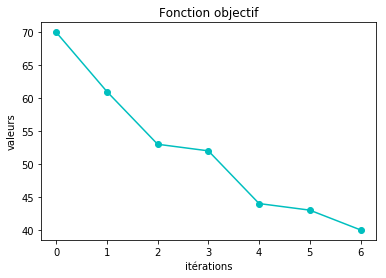

Mise à jour de la meilleure S. Itération n°1. ValFonctionObjectif : 746
Mise à jour de la meilleure S. Itération n°1. ValFonctionObjectif : 684
Mise à jour de la meilleure S. Itération n°3. ValFonctionObjectif : 590
Mise à jour de la meilleure S. Itération n°6. ValFonctionObjectif : 482


--- S O L U T I O N   F I N A L E ---
--- S O L U T I O N ---
Nom de l'instance résolue : sparse_10_30_3_2_I.full
Noeuds à évacuer : 
     ID : 117 - Taux d'évacuation : 70 - Date de début d'évacuation : 0
     ID : 199 - Taux d'évacuation : 72 - Date de début d'évacuation : 87
     ID : 271 - Taux d'évacuation : 74 - Date de début d'évacuation : 190
     ID : 84 - Taux d'évacuation : 71 - Date de début d'évacuation : 271
     ID : 24 - Taux d'évacuation : 134 - Date de début d'évacuation : 329
     ID : 164 - Taux d'évacuation : 74 - Date de début d'évacuation : 388
     ID : 163 - Taux d'évacuation : 74 - Date de début d'évacuation : 434
     ID : 236 - Taux d'évacuation : 71 - Date de début d'évacu

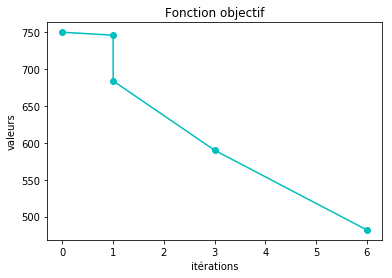

In [147]:
def test_algo(nomFichier, fctSolutionInitiale, fctFonctionObjectif, fctCritereArret, fctVoisinage) :
    solution, listeValFctObjectif = algo(nomFichier, fctSolutionInitiale, fctFonctionObjectif, fctCritereArret, fctVoisinage)
    affichageValFctObjectif(listeValFctObjectif)
    
test_algo("exemple_cours.txt", solutionInitiale_borneSup, fonctionObjectif_tempsEv_ecartRealisation, critereArret_moyenneGlissante_5_3, voisinage_pluriVoisinages)
test_algo("sparse_10_30_3_2_I.full", solutionInitiale_borneSup, fonctionObjectif_tempsEv_ecartRealisation, critereArret_moyenneGlissante_5_3, voisinage_pluriVoisinages)

## 4ème étape - Diversification
### Processus de diversification

In [92]:
from itertools import permutations
import random

# Retourne une liste de 3 solutions sur lesquelles executer l'algorithme
def listeMultiStart(nomFichier, evacuation, graphe): 
    listeSolMultiStart = []
    
    # La borne sup est toujours un point de départ, donc on l'ajoute à la liste
    listeSolMultiStart.append(borneSup(nomFichier, evacuation, graphe))
    
    # Récupération de toutes les permutations des noeuds à évacuer
    listPermut = list(permutations(evacuation.listeNoeudsE))
    
    # 2 nb aléatoires différents i et j
    i = random.randint(1, len(evacuation.listeNoeudsE))
    j = 0
    while(j == 0 or i == j):
        j = random.randint(1, len(evacuation.listeNoeudsE))
    # print("i = " + str(i))
    # print("j = " + str(j))
    
    # Création et ajout des solutions correspondant 
    # # La fonction borneSup se base sur l'ordre des noeuds à évacuer dans "evacuation" pour créer la solution
    # # Donc on doit le modifier avant d'appeler la fonction borneSup
    newEvac = copy.deepcopy(evacuation)
    newEvac.listeNoeudsE = list(listPermut[i])
    listeSolMultiStart.append(borneSup(nomFichier, newEvac, graphe))
    newEvac.listeNoeudsE = list(listPermut[j])
    listeSolMultiStart.append(borneSup(nomFichier, newEvac, graphe))
    
    return listeSolMultiStart

In [93]:
def test_listeMultiStart(nomFichier): 
    evacuation, graphe = lecture(nomFichier)
    listeSolMultiStart = listeMultiStart(nomFichier, evacuation, graphe)
    for start in listeSolMultiStart:
        affichageSolution(start)
        affichageGantt(start.gantt)
    
# test_listeMultiStart("exemple_cours.txt")

In [96]:
# Execution de l'algo sur plusieurs situations initiales
def multiStart(nomFichier, fctFonctionObjectif, fctCritereArret, fctVoisinage): 
    dateDebut = datetime.now()
    evacuation, graphe = lecture(nomFichier)
    listeSolMultiStart = listeMultiStart(nomFichier, evacuation, graphe)
    
    # Retours de la fonction
    solFinale = listeSolMultiStart[0]
    # # Pour la construction du graphe, de la forme [(sol)]
    listeValFctObjectifFinale = []
    
    for solInitiale in listeSolMultiStart:
        parcours(nomFichier, evacuation, graphe, solInitiale, fctFonctionObjectif, fctCritereArret, fctVoisinage)
        # Si on a trouvé une meilleure solution, on la met à jour
        if meilleureSolution.valFctObjectif < solFinale.valFctObjectif:
            solFinale = meilleureSolution
            listeValFctObjectifFinale = listeValFctObjectif
    solFinale.tpsCalcul = (datetime.now() - dateDebut).total_seconds()
    # Renvoi de la la meilleure solution trouvée
    return solFinale, listeValFctObjectifFinale

Mise à jour de la meilleure S. Itération n°1. ValFonctionObjectif : 684
Mise à jour de la meilleure S. Itération n°2. ValFonctionObjectif : 684
Mise à jour de la meilleure S. Itération n°1. ValFonctionObjectif : 684
Mise à jour de la meilleure S. Itération n°2. ValFonctionObjectif : 684
Mise à jour de la meilleure S. Itération n°3. ValFonctionObjectif : 576
Mise à jour de la meilleure S. Itération n°4. ValFonctionObjectif : 576
Mise à jour de la meilleure S. Itération n°1. ValFonctionObjectif : 638
Mise à jour de la meilleure S. Itération n°4. ValFonctionObjectif : 576
--- S O L U T I O N ---
Nom de l'instance résolue : sparse_10_30_3_2_I.full
Noeuds à évacuer : 
     ID : 117 - Taux d'évacuation : 70 - Date de début d'évacuation : 0
     ID : 199 - Taux d'évacuation : 72 - Date de début d'évacuation : 87
     ID : 271 - Taux d'évacuation : 74 - Date de début d'évacuation : 190
     ID : 84 - Taux d'évacuation : 71 - Date de début d'évacuation : 271
     ID : 24 - Taux d'évacuation : 1

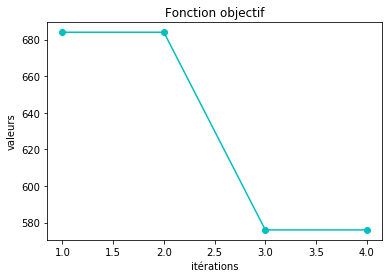

In [144]:
def test_multiStart(nomFichier, fctFonctionObjectif, fctCritereArret, fctVoisinage):
    evacuation, graphe = lecture(nomFichier)
    sol, listeValFctObj = multiStart(nomFichier, fctFonctionObjectif, fctCritereArret, fctVoisinage)
    affichageSolution(sol)
    affichageValFctObjectif(listeValFctObj)

#test_multiStart("exemple_cours.txt", fonctionObjectif_tempsEv_ecartRealisation, critereArret_moyenneGlissante_5_3, voisinage_pluriVoisinages)
test_multiStart("sparse_10_30_3_2_I.full", fonctionObjectif_tempsEv_ecartRealisation, critereArret_moyenneGlissante_5_3, voisinage_pluriVoisinages)

In [142]:
# Depuis une solution donnée, rapproche au maximum les dates d'évacuation. 
def compactage(evacuation, graphe, solution):
    # Tri des noeudsE par dateE
    listeNoeudsESolTriee = sorted(solution.listeNoeudsESol, key=lambda noeudESol: noeudESol.dateE)
    # Debug
    #print("Liste triée = ")
    #for noeud in listeNoeudsESolTriee:
        #print("\t" + str(noeud.nom))
    
    # Décrémentation de dateE pour chaque noeudE
    for noeudESolTrie in listeNoeudsESolTriee:
        print("For : noeud " + str(noeudESolTrie.nom))
        # Tant que le résultat est réalisable, on continue
        while((solution.nature == "valid") and (not([noeudESol.dateE for noeudESol in solution.listeNoeudsESol if noeudESol.nom == noeudESolTrie.nom][0] == 0))):
            # print("While : date E = " + str([noeudESol.dateE for noeudESol in solution.listeNoeudsESol if noeudESol.nom == noeudESolTrie.nom][0]))
            # Décrémentation de dateE
            [noeudESol for noeudESol in solution.listeNoeudsESol if noeudESol.nom == noeudESolTrie.nom][0].dateE -= 1
            creationGantt(evacuation, graphe, solution)
            solution.valFctObjectif = valFonctionObjectif(evacuation, graphe, solution)
            if not(verification(evacuation, graphe, solution)):
                #print("Stop")
                #print("solution.nature = " + solution.nature)
                solution.nature = "invalid"
                #print("solution.nature = " + solution.nature)
                # On retourne à la dernière solution réalisable
                [noeudESol for noeudESol in solution.listeNoeudsESol if noeudESol.nom == noeudESolTrie.nom][0].dateE  += 1
                creationGantt(evacuation, graphe, solution)
        solution.nature = "valid"


In [24]:
def test_compactage(nomFichier):
    evacuation, graphe = lecture(nomFichier)
    start = borneSup(nomFichier, evacuation, graphe)
    compactage(evacuation, graphe, start)
    affichageSolution(start)
    
    #listeSolMultiStart = listeMultiStart(nomFichier, evacuation, graphe)
    #for start in listeSolMultiStart:
        # affichageSolution(start)
        #compactage(evacuation, graphe, start)
        # affichageSolution(start)
        #print("valFctObjectif = " + str(start.valFctObjectif))

test_compactage("sparse_10_30_3_2_I.full")

For : noeud 117
For : noeud 199
For : noeud 271
For : noeud 84
For : noeud 24
For : noeud 164
For : noeud 163
For : noeud 236
For : noeud 124
For : noeud 228
--- S O L U T I O N ---
Nom de l'instance résolue : sparse_10_30_3_2_I.full
Noeuds à évacuer : 
     ID : 117 - Taux d'évacuation : 70 - Date de début d'évacuation : 0
     ID : 199 - Taux d'évacuation : 72 - Date de début d'évacuation : 62
     ID : 271 - Taux d'évacuation : 74 - Date de début d'évacuation : 0
     ID : 84 - Taux d'évacuation : 71 - Date de début d'évacuation : 0
     ID : 24 - Taux d'évacuation : 134 - Date de début d'évacuation : 52
     ID : 164 - Taux d'évacuation : 74 - Date de début d'évacuation : 87
     ID : 163 - Taux d'évacuation : 74 - Date de début d'évacuation : 103
     ID : 236 - Taux d'évacuation : 71 - Date de début d'évacuation : 86
     ID : 124 - Taux d'évacuation : 72 - Date de début d'évacuation : 121
     ID : 228 - Taux d'évacuation : 72 - Date de début d'évacuation : 134
Nature : valid
Va